# LEVEL 3 :

## TASK 1 : Restaurant Reviews

1. Analyze the review text to find common positive and negative keywords.

2. Calculate the average length of reviews.

3. Explore whether longer reviews are associated with higher or lower ratings.

This helps us understand customer sentiment — what happy vs unhappy customers write, and whether long reviews indicate stronger opinions.

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re

* import re — the regular expressions module.

* Why: robust text cleaning (remove punctuation, digits, collapse spaces).

* from collections import Counter — imports Counter, a handy frequency counter for lists.

* Why: fast, memory-efficient word frequency counting and most_common() helper.

* from textblob import TextBlob — imports TextBlob, a simple NLP library for sentiment analysis (polarity).

* Why: easy per-word/per-sentence polarity scoring without complex models.

In [3]:
# Load and clean the dataset.

df = pd.read_csv("Data Analyst_cognifyz.csv")
df.columns = df.columns.str.strip().str.lower()

* df.columns — accesses column names (an Index).

.str.strip() — removes leading/trailing whitespace from each column name.

* Why: avoids mismatches like " review text" vs "review text".

.str.lower() — converts column names to lowercase.

* Why: normalizes variations like "Review Text" and "review text" so code can find the column reliably.

In [4]:
print(df.columns)

Index(['restaurant id', 'restaurant name', 'country code', 'city', 'address',
       'locality', 'locality verbose', 'longitude', 'latitude', 'cuisines',
       'average cost for two', 'currency', 'has table booking',
       'has online delivery', 'is delivering now', 'switch to order menu',
       'price range', 'aggregate rating', 'rating color', 'rating text',
       'votes'],
      dtype='object')


In [6]:
# Pick the reviews column: prefer 'review text', fallback to 'rating text'.

if 'review text' in df.columns:
    review_col = 'review text'
elif 'rating text' in df.columns:
    review_col = 'rating text'
else:
    raise KeyError("No 'review text' or 'rating text' column found. Please provide one of these.")

if 'review text' in df.columns: checks for the exact normalized column name.

* Why: earlier you said the dataset didn’t have a reviews column but does have a rating-text-like column. This code chooses review text if present.

elif 'rating text' in df.columns: — fallback: use rating text if review text absent.

* Why: the user said rating text contains strings like "excellent", "good". We accept either.

raise KeyError(...) — stops execution with a clear error if neither column exists.

* Why: fail fast with a helpful message, so you can fix the column name or provide the right file.

In [7]:
#Create a safe text column (fill missing and ensure strings).

df['raw_review'] = df[review_col].fillna('').astype(str)

* df[review_col] — selects the column identified previously.

* .fillna('') — replaces NaN (missing values) with empty strings ''.

* Why: avoids errors when applying string functions later.

* .astype(str) — ensures every value is a Python string object.

* Why: some cells might be numbers or other types; converting to string guarantees consistent operations.

* df['raw_review'] = ... — saves the cleaned string column as raw_review.

* Why: keep original data untouched and work on a derived column.

In [8]:
# Cleaning function: lowercase, remove non-letters, collapse spaces.

def clean_text(text):
    text = text.lower()                          # lowercase for consistency
    text = re.sub(r'[^a-z\s]', ' ', text)        # remove digits/punctuations, keep spaces
    text = re.sub(r'\s+', ' ', text).strip()     # collapse multiple spaces and trim
    return text

* This is a small, explicit text-cleaning pipeline — each line:

1 . text.lower() :

* Converts text to lowercase.

* Why: "Excellent" and "excellent" should count the same.

2 . re.sub(r'[^a-z\s]', ' ', text)

* re.sub(pattern, repl, text) replaces matches of pattern with repl.

* Pattern r'[^a-z\s]' = any character that is not a lowercase letter a-z or whitespace \s.

* So it replaces punctuation, digits, emojis, etc., with a space.

* Why: we want only clean words; punctuation can split tokens unpredictably.

3 . re.sub(r'\s+', ' ', text).strip()

* r'\s+' matches one or more whitespace characters; replace with a single space.

* .strip() removes leading/trailing spaces.

* Why: collapse sequences of spaces into one and trim edges — neat tokens.

4 . return text — returns the cleaned string.

* Why make a function? Reuse, readability, and to apply it to the entire column succinctly.

In [9]:
# Apply cleaning and tokenize into words.

df['clean_review'] = df['raw_review'].apply(clean_text)
df['tokens'] = df['clean_review'].apply(lambda t: t.split() if t else [])

1 . df['raw_review'].apply(clean_text) — applies the clean_text function to each cell.

* Why: vectorized-style apply over rows; produces new cleaned string column clean_review.

2 . df['clean_review'].apply(lambda t: t.split() if t else [])

* t.split() splits the cleaned string into a list of words (tokens) on whitespace.

* if t else [] ensures empty strings become empty lists [], not [''].

* Why: token lists are handy for counting words and computing review length.

Result:

3 . df['tokens'] is a column of lists (each row -> list of words in that review).

In [11]:
from collections import Counter

In [12]:
# Count word frequencies across all reviews (exclude short tokens)

all_words = [w for tokens in df['tokens'] for w in tokens if len(w) > 2]
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(50)  # top 50 words

1 . all_words = [w for tokens in df['tokens'] for w in tokens if len(w) > 2]

* This is a list comprehension that flattens the list-of-lists into one big word list.

* if len(w) > 2 filters out very short tokens like "a", "to", "is" — removes noisy one/two-letter tokens.

* Why: reduces noise; one-letter words usually not meaningful as keywords.

2 . word_counts = Counter(all_words)

* Counter counts occurrences of each word and stores frequency mapping: {'delicious': 120, 'good': 300, ...}

* Why: fast and convenient to get counts and most_common().

3 . most_common_words = word_counts.most_common(50)

* Returns top 50 frequent words as (word, count) tuples.

* Why: quick summary of most frequent tokens in reviews.

In [14]:
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     /Users/b.tejateja/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/b.tejateja/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/b.tejateja/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/b.tejateja/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/b.tejateja/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/b.tejateja/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [17]:
from textblob import TextBlob

In [18]:
# Score each unique word with TextBlob polarity and classify positive/negative .

word_sentiments = {}
for word in list(word_counts.keys()):
    tb = TextBlob(word)
    polarity = tb.sentiment.polarity
    word_sentiments[word] = polarity

1 . word_sentiments = {} — initialize an empty dict to store each word's polarity.

2 . for word in list(word_counts.keys()): — iterate through unique words (keys of Counter).

* list() ensures we iterate over a stable list (not necessary but safe).

3 . tb = TextBlob(word) — create a TextBlob object for the single word.

* Why: TextBlob computes sentiment polarity from text. Even a single word gets a polarity score (e.g., "delicious" -> positive).

4 . polarity = tb.sentiment.polarity — get polarity, float between -1 (very negative) and +1 (very positive).

5 . word_sentiments[word] = polarity — store polarity in a dict keyed by word.

Why do this per word?

* We need to identify common positive and negative keywords. Polarity scores let us classify words as positive or negative automatically without manually building a lexicon.

Note: Single-word sentiment is coarse; TextBlob uses a lexicon-based approach, so it works fine for common adjectives like "delicious", "bad", "slow".

In [19]:
# Separate positive and negative words using polarity thresholds.

POS_THRESHOLD = 0.3
NEG_THRESHOLD = -0.3

In [20]:
positive_words = [(w, count, word_sentiments[w]) for w, count in word_counts.items() if word_sentiments[w] > POS_THRESHOLD]
negative_words = [(w, count, word_sentiments[w]) for w, count in word_counts.items() if word_sentiments[w] < NEG_THRESHOLD]

1 . POS_THRESHOLD and NEG_THRESHOLD are constants we choose to say when a word is "clearly positive" (> 0.3) or "clearly negative" (< -0.3).

* Why thresholds? Polarity values near 0 are neutral — we only want clearly positive/negative words.

* positive_words = [...] builds a list of tuples (word, count, polarity) for words whose polarity exceeds the positive threshold.

* negative_words = [...] similarly for negative words below the negative threshold.

* Why include counts and polarity?

* Count tells how frequent the word is in reviews (importance).

* Polarity tells the sentiment strength.

In [21]:
# Sort by frequency

positive_words_sorted = sorted(positive_words, key=lambda x: x[1], reverse=True)[:20]
negative_words_sorted = sorted(negative_words, key=lambda x: x[1], reverse=True)[:20]

* sorted(..., key=lambda x: x[1], reverse=True) sorts tuples by the count element (index 1) in descending order.

* [:20] slices to keep the top 20 most frequent positive/negative words.

* Why: gives you the most relevant common keywords (both sentiment and prevalence).

In [22]:
# Average review length (in words).

df['review_length'] = df['tokens'].apply(len)
average_length = df['review_length'].mean().round(2)

1 . df['tokens'].apply(len) — for each token list, compute its length (number of words in the review).

* Why: review length measured in words is a simple and informative metric.

2 . df['review_length'] = ... — stores word counts per review.

3 . df['review_length'].mean() — computes the mean (average) across all reviews.

4 . .round(2) — rounds to two decimals for readability.

* Why average review length?

* Helps compare how verbose reviewers are. Combined with sentiment or rating, it can show if longer reviews correlate with stronger feelings.

In [23]:
# Relationship between review length and numeric rating (if available).

rating_col = None
if 'aggregate rating' in df.columns:
    rating_col = 'aggregate rating'
elif 'rating' in df.columns:
    rating_col = 'rating'
    
if rating_col is not None:
    # Ensure rating is numeric
    df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce').fillna(0)
    corr = df['review_length'].corr(df[rating_col]).round(2)
else:
    corr = None

* We try to find a column for numeric rating:

* First preference: 'aggregate rating' (common in your dataset).

* Fallback: 'rating'.

* If found:

* pd.to_numeric(df[rating_col], errors='coerce') attempts to convert the rating column to numeric type.

* errors='coerce' will convert non-numeric values to NaN.

* Why: ratings can sometimes have stray strings; this ensures a numeric column for correlation.

* .fillna(0) replaces NaN with 0. (Optionally you might prefer to drop NaNs; filling is a simple, safe default.)

* df['review_length'].corr(df[rating_col]) computes the Pearson correlation coefficient between review length and rating.

* Why Pearson correlation? It's the standard measure for linear association between two numeric variables.

* .round(2) keeps two decimals.

* If no rating column exists, corr = None and we skip correlation.

##### Important note about correlation interpretation:

* A value near 0 = no linear relationship

1 . Positive = longer reviews associated with higher ratings

2 . Negative = longer reviews associated with lower ratings

3 . Correlation does not imply causation.

In [24]:
#  Print results.

print("Top positive keywords (word, count, polarity):")
for w,c,p in positive_words_sorted:
    print(f"{w:20s} {c:6d}   polarity={p:.2f}")

Top positive keywords (word, count, polarity):
good                   3179   polarity=0.70
excellent               301   polarity=1.00


In [25]:
print("\nTop negative keywords (word, count, polarity):")
for w,c,p in negative_words_sorted:
    print(f"{w:20s} {c:6d}   polarity={p:.2f}")


Top negative keywords (word, count, polarity):
poor                    186   polarity=-0.40


In [26]:
print(f"\nAverage review length (words): {average_length}")
if corr is not None:
    print(f"Correlation between review length and rating: {corr}")
else:
    print("No numeric rating column found to compute correlation.")


Average review length (words): 1.34
Correlation between review length and rating: -0.6


#### Nicely formatted print outputs:

* Header line for positive keywords.

* Loop for w,c,p in positive_words_sorted: prints each word (w), its count (c) and polarity (p).

* f"{w:20s} {c:6d} polarity={p:.2f}" is a formatted string:

* {w:20s} — left-pad/limit the word cell to width 20 characters (for alignment).

* {c:6d} — 6-character integer for count (right-aligned).

* {p:.2f} — polarity rounded to 2 decimals.

* Same loop for negative keywords.

* Print average review length.

* If correlation exists, print it; otherwise say we couldn't compute.

* Why this format?

* Readable console output. Good for showing results in a notebook and copying into your report.

## TASK 2 : Votes Analysis 

In [27]:
# Top & Bottom Restaurants by Votes.

top_votes = df.loc[df['votes'].idxmax()]
low_votes = df.loc[df['votes'].idxmin()]

In [28]:
print("Restaurant with Highest Votes:")
print(top_votes[['restaurant name', 'votes', 'aggregate rating']], "\n")

Restaurant with Highest Votes:
restaurant name      Toit
votes               10934
aggregate rating      4.8
Name: 728, dtype: object 



In [29]:
print("Restaurant with Lowest Votes:")
print(low_votes[['restaurant name', 'votes', 'aggregate rating']], "\n")

Restaurant with Lowest Votes:
restaurant name     Cantinho da Gula
votes                              0
aggregate rating                 0.0
Name: 69, dtype: object 



In [30]:
# Correlation between votes and rating.

corr = df['votes'].corr(df['aggregate rating']).round(2)
print(f"Correlation between votes and rating: {corr}")

Correlation between votes and rating: 0.31


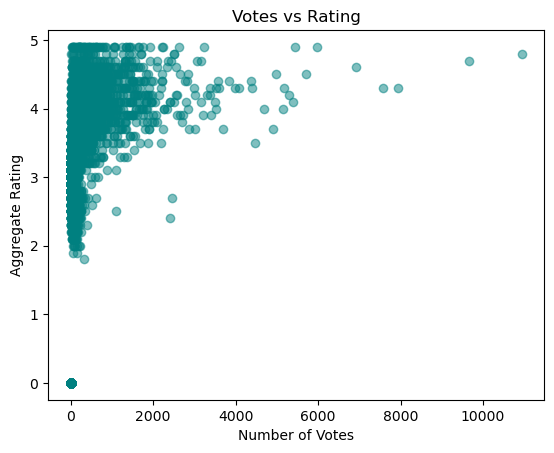

In [31]:
# Visualization.

plt.scatter(df['votes'], df['aggregate rating'], alpha=0.5, color='teal')
plt.title("Votes vs Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.show()

1 . idxmax() / idxmin() → find the row index of highest/lowest votes.

* Top & bottom restaurants → show who got the most and least votes.

2 . corr() → checks how votes and ratings move together.

* Positive value → more votes = higher ratings.

* Near 0 → no clear link.

3 . Scatter plot → shows relationship visually (each dot = restaurant).

### TASK 3 : Price range vs Online Delivery and Table Booking 

In [35]:
# Group by price range and calculate percentages.

price_delivery = df.groupby('price range')['has online delivery'].value_counts(normalize=True).unstack().fillna(0) * 100
price_booking = df.groupby('price range')['has table booking'].value_counts(normalize=True).unstack().fillna(0) * 100

In [36]:
print("Online Delivery by Price Range (%):\n", price_delivery, "\n")
print("Table Booking by Price Range (%):\n", price_booking, "\n")

Online Delivery by Price Range (%):
 has online delivery         No        Yes
price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369 

Table Booking by Price Range (%):
 has table booking         No        Yes
price range                            
1                  99.977498   0.022502
2                  92.322518   7.677482
3                  54.261364  45.738636
4                  53.242321  46.757679 



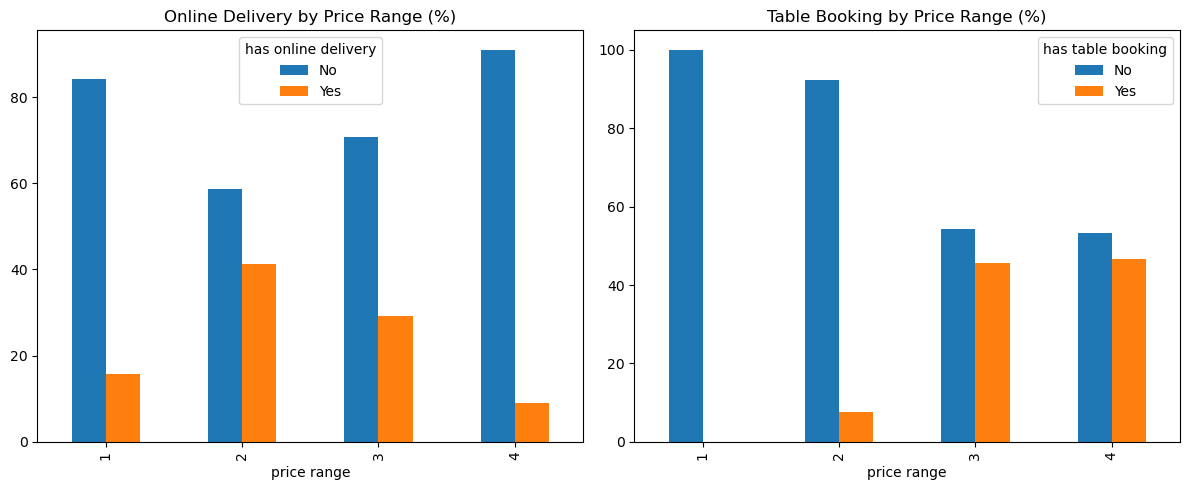

In [37]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
price_delivery.plot(kind='bar', ax=axes[0], title='Online Delivery by Price Range (%)')
price_booking.plot(kind='bar', ax=axes[1], title='Table Booking by Price Range (%)')
plt.tight_layout()
plt.show()

In [38]:
# Interpretation helper: correlation with price
delivery_corr = df['price range'].corr(df['has online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)).round(2)
booking_corr = df['price range'].corr(df['has table booking'].apply(lambda x: 1 if x == 'Yes' else 0)).round(2)

print(f"Correlation (Price vs Online Delivery): {delivery_corr}")
print(f"Correlation (Price vs Table Booking): {booking_corr}")

Correlation (Price vs Online Delivery): 0.08
Correlation (Price vs Table Booking): 0.5


##### Simple Explanation :

* Groups restaurants by price range and checks how many offer online delivery or table booking.

* Converts results into percentages to easily compare across price levels.

* Plots bar charts to visualize the trend.

* Calculates correlation to check relationship strength:

1 . Positive correlation → higher price → more likely to offer service.

2 . Negative → opposite.